## Web Scrapping

### Installing required libraries

In [8]:
pip install selenium

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install webdriver_manager

### Importing modules

In [10]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup
import pandas as pd
import time

In [11]:
service = Service(r'C:\Users\Public\Downloads\chromedriver-win32\chromedriver.exe')
driver = webdriver.Chrome(service=service)


### Fetching website URL

In [12]:
url = "https://www.cars24.com/buy-used-car?f=make%3A%3D%3Ahonda&sort=bestmatch&serveWarrantyCount=true&listingSource=TabFilter&storeCityId=2378"
driver.get(url)

In [13]:
last_height = driver.execute_script("return document.body.scrollHeight")
while True:
    # Scroll down to the bottom
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    # Wait for new data to load
    time.sleep(5)
    # Calculate new scroll height and compare with last scroll height
    new_height = driver.execute_script("return document.body.scrollHeight")
    if new_height == last_height:
        break
    last_height = new_height

In [14]:
# Get page source and parse it with BeautifulSoup
soup = BeautifulSoup(driver.page_source, 'html.parser')


In [15]:
soup

<html lang="en-IN"><head>
<link href="https://assets.cars24.com" rel="preconnect"/>
<link href="https://fastly-production.24c.in" rel="preconnect"/>
<link href="https://connect.facebook.net" rel="preconnect"/>
<link href="https://www.googletagmanager.com" rel="preconnect"/>
<link href="https://www.google-analytics.com" rel="preconnect"/>
<link href="https://analytics.twitter.com" rel="preconnect"/>
<link href="https://www.facebook.com" rel="preconnect"/>
<link href="https://www.google.com" rel="preconnect"/>
<link href="https://www.google.co.in" rel="preconnect"/>
<link href="https://googleads.g.doubleclick.net" rel="preconnect"/>
<link href="https://t.co" rel="preconnect"/>
<link href="https://static.ads-twitter.com" rel="preconnect"/>
<link href="https://tracking.cars24.com" rel="preconnect"/>
<link href="https://www.googleoptimize.com" rel="preconnect"/>
<link href="https://web-sdk.smartlook.com" rel="preconnect"/><meta charset="utf-8"/><meta content="width=device-width, initial-sca

### Storing informations in dataframe form

In [16]:
names = []
fuel_types = []
distances = []
transmissions = []
prices = []

# Extract car details
for result in soup.find_all('div', {'class': '_2YB7p'}):
    # Name
    name_element = result.find('h3', {'class': '_11dVb'})
    names.append(name_element.get_text().strip() if name_element else None)
    
    # Details
    details_elements = result.find_all('li')
    fuel_type = None
    distance = None
    transmission = None
    for element in details_elements:
        text = element.get_text().strip()
        if text.endswith('km'):
            distance = text
        elif text.endswith('Petrol') or text.endswith('Diesel'):
            fuel_type = text
        elif text.endswith('Manual') or text.endswith('Automatic'):
            transmission = text
    
    fuel_types.append(fuel_type)
    distances.append(distance)
    transmissions.append(transmission)

# Prices
prices_elements = soup.find_all('strong', {'class': '_3RL-I'})
prices = [element.get_text().strip() for element in prices_elements]

# Close the WebDriver
driver.quit()

# Create DataFrame
df = pd.DataFrame({
    'Name': names,
    'Fuel Type': fuel_types,
    'Distance': distances,
    'Transmission': transmissions,
    'Price': prices
})

# Display DataFrame
df

,Name,Fuel Type,Distance,Transmission,Price
0,2012 Honda Brio V MT,Petrol,"61,764 km",Manual,₹2.47 Lakh
1,2018 Honda WR-V 1.2L I-VTEC VX MT,Petrol,"59,897 km",Manual,₹7.11 Lakh
2,2016 Honda Jazz 1.2L I-VTEC V,Petrol,"36,158 km",Manual,₹4.20 Lakh
3,2019 Honda City 1.5L I-VTEC VX CVT,Petrol,"54,705 km",Automatic,₹9.58 Lakh
4,2011 Honda City 1.5L I-VTEC V AT,Petrol,"65,495 km",Automatic,₹2.76 Lakh
...,...,...,...,...,...
57,2018 Honda Amaze 1.2L I-VTEC V CVT,Petrol,"66,269 km",Automatic,₹5.61 Lakh
58,2016 Honda City 1.5L I-VTEC SV,Petrol,"60,664 km",Manual,₹4.96 Lakh
59,2015 Honda City 1.5L I-VTEC VX,Petrol,"1,00,831 km",Manual,₹4.70 Lakh
60,2019 Honda Jazz 1.2L I-VTEC VX CVT,Petrol,"46,371 km",Automatic,₹6.59 Lakh


## Data Cleaning

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df['Year of Manufacturing'] = df['Name'].str[:4]
df['Year of Manufacturing']

0     2012
1     2018
2     2016
3     2019
4     2011
      ... 
57    2018
58    2016
59    2015
60    2019
61    2018
Name: Year of Manufacturing, Length: 62, dtype: object

In [19]:
df['Name'] = df['Name'].str[5:]
df['Name'].str.strip()
df['Name']

0                   Honda Brio V MT
1      Honda WR-V 1.2L I-VTEC VX MT
2          Honda Jazz 1.2L I-VTEC V
3     Honda City 1.5L I-VTEC VX CVT
4       Honda City 1.5L I-VTEC V AT
                  ...              
57    Honda Amaze 1.2L I-VTEC V CVT
58        Honda City 1.5L I-VTEC SV
59        Honda City 1.5L I-VTEC VX
60    Honda Jazz 1.2L I-VTEC VX CVT
61        Honda City 1.5L I-VTEC VX
Name: Name, Length: 62, dtype: object

In [20]:
df['Kilometers Driven'] = df['Distance'].str.replace(' km', '').str.replace(',', '').astype(int)
df['Kilometers Driven']

0      61764
1      59897
2      36158
3      54705
4      65495
       ...  
57     66269
58     60664
59    100831
60     46371
61     31998
Name: Kilometers Driven, Length: 62, dtype: int32

In [21]:
df['Price(in Lakh Rupees)']  = df['Price'].str.replace('₹','').str.replace(' Lakh','').astype(float)
df['Price(in Lakh Rupees)']

0     2.47
1     7.11
2     4.20
3     9.58
4     2.76
      ... 
57    5.61
58    4.96
59    4.70
60    6.59
61    8.68
Name: Price(in Lakh Rupees), Length: 62, dtype: float64

In [22]:
df.head()

,Name,Fuel Type,Distance,Transmission,Price,Year of Manufacturing,Kilometers Driven,Price(in Lakh Rupees)
0,Honda Brio V MT,Petrol,"61,764 km",Manual,₹2.47 Lakh,2012,61764,2.47
1,Honda WR-V 1.2L I-VTEC VX MT,Petrol,"59,897 km",Manual,₹7.11 Lakh,2018,59897,7.11
2,Honda Jazz 1.2L I-VTEC V,Petrol,"36,158 km",Manual,₹4.20 Lakh,2016,36158,4.20
3,Honda City 1.5L I-VTEC VX CVT,Petrol,"54,705 km",Automatic,₹9.58 Lakh,2019,54705,9.58
4,Honda City 1.5L I-VTEC V AT,Petrol,"65,495 km",Automatic,₹2.76 Lakh,2011,65495,2.76


In [23]:
df = df.drop(columns=['Price' ,'Distance'])

In [24]:
df.head()

,Name,Fuel Type,Transmission,Year of Manufacturing,Kilometers Driven,Price(in Lakh Rupees)
0,Honda Brio V MT,Petrol,Manual,2012,61764,2.47
1,Honda WR-V 1.2L I-VTEC VX MT,Petrol,Manual,2018,59897,7.11
2,Honda Jazz 1.2L I-VTEC V,Petrol,Manual,2016,36158,4.20
3,Honda City 1.5L I-VTEC VX CVT,Petrol,Automatic,2019,54705,9.58
4,Honda City 1.5L I-VTEC V AT,Petrol,Automatic,2011,65495,2.76


In [25]:
df.to_csv('Cars24_Total_data.csv',index=False)

## Data Analysis


1. Describing the dataset
2. Distribution of car prices with frequency
3. Distribution of kilometers driven with frequency
4. Average price by fuel type
5. Average kilometers driven by transmission type
6. Average price by year of manufacturing
7. Price vs Year of Manufacturing
8. Count of Cars by year of manufacturing
9. Distribution of fuel types
10. Average price by transmission and fuel type

In [26]:
df = pd.read_csv('Cars24_Total_data.csv')

In [27]:
df.head()

,Name,Fuel Type,Transmission,Year of Manufacturing,Kilometers Driven,Price(in Lakh Rupees)
0,Honda Brio V MT,Petrol,Manual,2012,61764,2.47
1,Honda WR-V 1.2L I-VTEC VX MT,Petrol,Manual,2018,59897,7.11
2,Honda Jazz 1.2L I-VTEC V,Petrol,Manual,2016,36158,4.20
3,Honda City 1.5L I-VTEC VX CVT,Petrol,Automatic,2019,54705,9.58
4,Honda City 1.5L I-VTEC V AT,Petrol,Automatic,2011,65495,2.76


In [28]:
df.describe()

,Year of Manufacturing,Kilometers Driven,Price(in Lakh Rupees)
count,62.000000,62.000000,62.000000
mean,2016.693548,54687.177419,6.028226
std,2.670965,26131.930903,2.151344
min,2011.000000,4980.000000,2.470000
25%,2015.000000,33657.250000,4.712500
50%,2017.000000,55812.000000,6.140000
75%,2018.000000,73728.750000,7.057500
max,2023.000000,106523.000000,13.400000


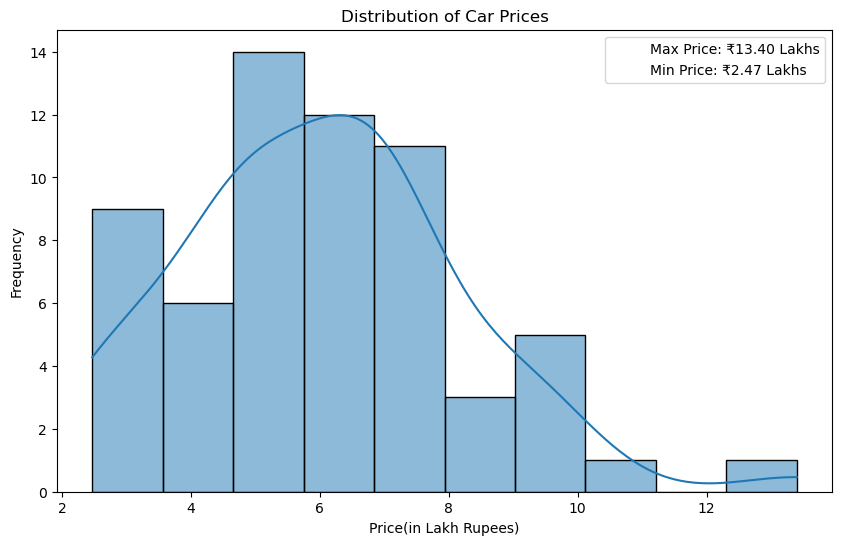

In [29]:
# Find the max and min prices
max_price = df['Price(in Lakh Rupees)'].max()
min_price = df['Price(in Lakh Rupees)'].min()

# Plot the distribution of car prices
plt.figure(figsize=(10, 6))
sns.histplot(df['Price(in Lakh Rupees)'], kde=True)
plt.plot([], [], ' ', label=f'Max Price: ₹{max_price:,.2f} Lakhs')
plt.plot([], [], ' ', label=f'Min Price: ₹{min_price:,.2f} Lakhs')
plt.legend(loc='upper right')
plt.title('Distribution of Car Prices')
plt.xlabel('Price(in Lakh Rupees)')
plt.ylabel('Frequency')
plt.show()

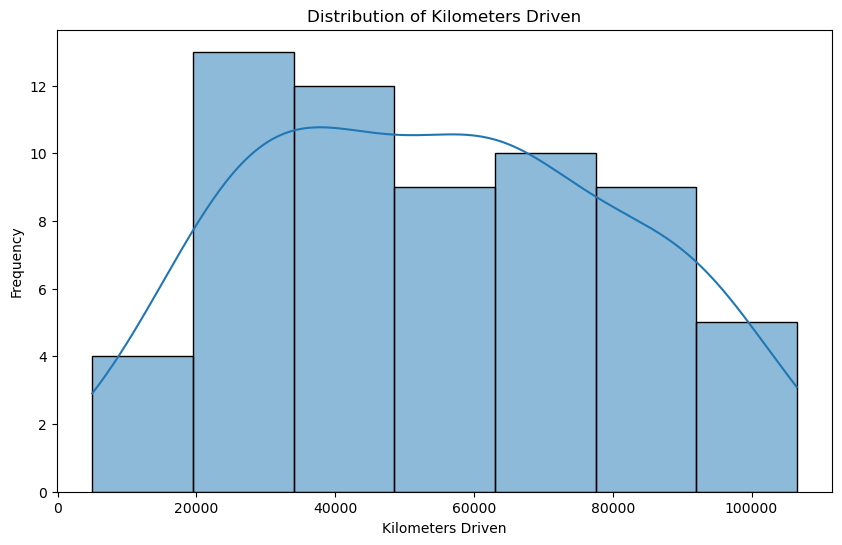

In [30]:
# Plot the distribution of kilometers driven
plt.figure(figsize=(10, 6))
sns.histplot(df['Kilometers Driven'], kde=True)
plt.title('Distribution of Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Frequency')
plt.show()

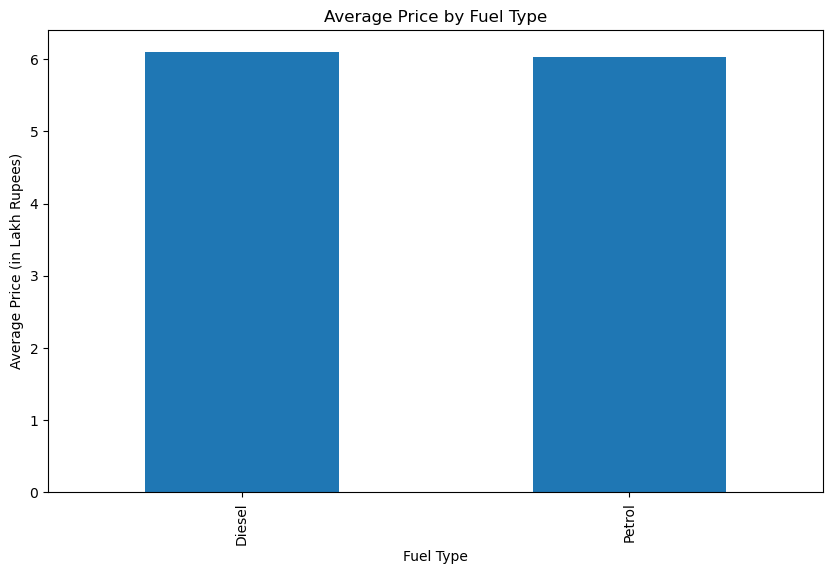

In [31]:
# Calculate average price by fuel type
avg_price_by_fuel = df.groupby('Fuel Type')['Price(in Lakh Rupees)'].mean()

# Plot average price by fuel type
plt.figure(figsize=(10, 6))
avg_price_by_fuel.plot(kind='bar')
plt.title('Average Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Average Price (in Lakh Rupees)')
plt.show()

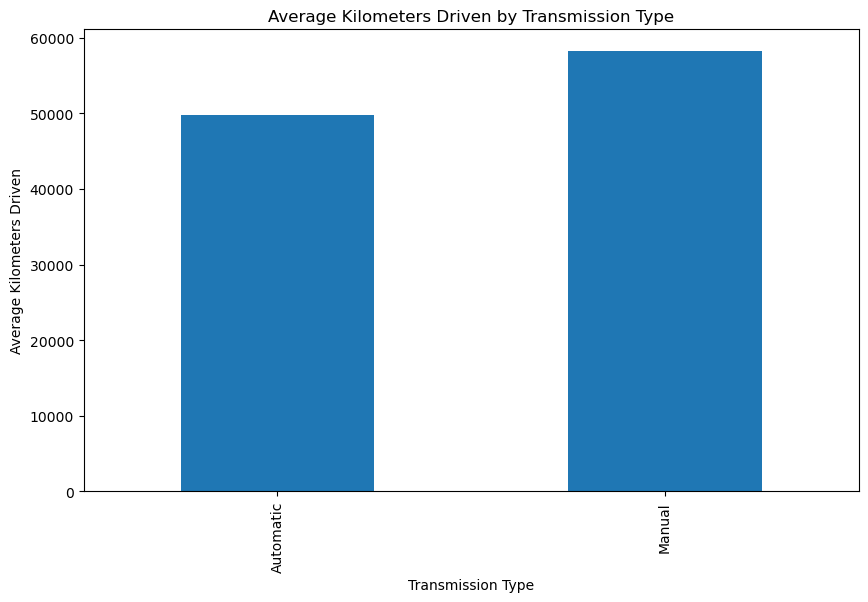

In [32]:
# Calculate average kilometers driven by transmission type
avg_km_by_transmission = df.groupby('Transmission')['Kilometers Driven'].mean()

# Plot average kilometers driven by transmission type
plt.figure(figsize=(10, 6))
avg_km_by_transmission.plot(kind='bar')
plt.title('Average Kilometers Driven by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Average Kilometers Driven')
plt.show()

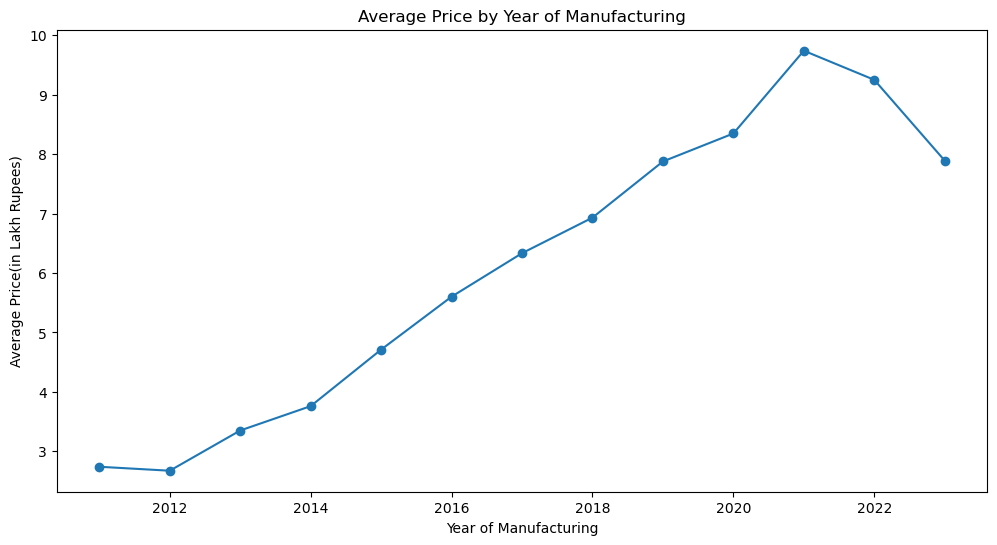

In [33]:
# Calculate average price by year of manufacturing
avg_price_by_year = df.groupby('Year of Manufacturing')['Price(in Lakh Rupees)'].mean()

# Plot average price by year of manufacturing
plt.figure(figsize=(12, 6))
avg_price_by_year.plot(kind='line', marker='o')
plt.title('Average Price by Year of Manufacturing')
plt.xlabel('Year of Manufacturing')
plt.ylabel('Average Price(in Lakh Rupees)')
# plt.xticks(rotation=45)
plt.show()

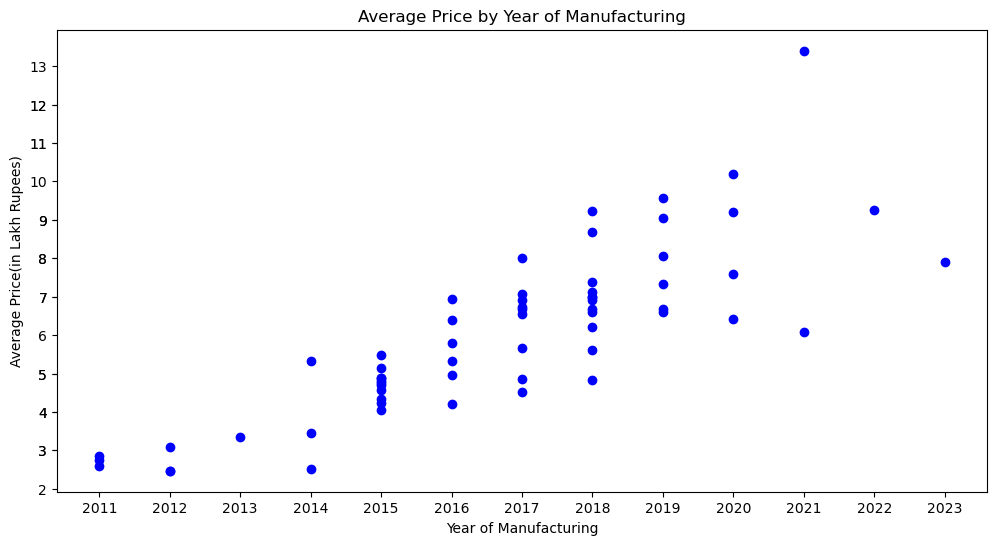

In [34]:
#Scatter plot of Price vs Year of Manufacturing
plt.figure(figsize=(12, 6))
# avg_price_by_year.plot(kind='line', marker='o')
plt.scatter(x=df['Year of Manufacturing'],y=df['Price(in Lakh Rupees)'],c='b')
plt.title('Average Price by Year of Manufacturing')
plt.xlabel('Year of Manufacturing')
plt.ylabel('Average Price(in Lakh Rupees)')

x_ticks = np.linspace(df['Year of Manufacturing'].min(),df['Year of Manufacturing'].max(), num =13).astype(int)
y_ticks = np.linspace(df['Price(in Lakh Rupees)'].min(),df['Price(in Lakh Rupees)'].max(), num =20).astype(int)
plt.xticks(x_ticks)
plt.yticks(y_ticks)
# plt.xticks(rotation=45)
plt.show()

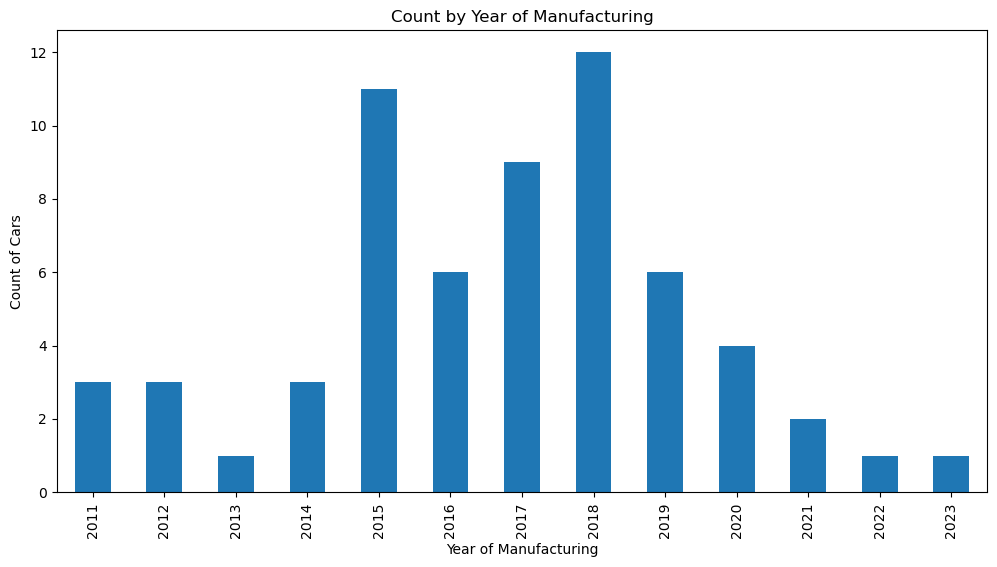

In [35]:
avg_count_by_years = df.groupby('Year of Manufacturing')['Price(in Lakh Rupees)'].count()
# print(avg_count_by_years)

# Plot average price by year of manufacturing
plt.figure(figsize=(12, 6))
avg_count_by_years.plot(kind='bar')
# avg_count_by_years.plot(kind='line', marker='o')
plt.title('Count by Year of Manufacturing')
plt.xlabel('Year of Manufacturing')
plt.ylabel('Count of Cars')
# plt.xticks(rotation=45)
plt.show()

Fuel Type
Diesel     2
Petrol    60
Name: Name, dtype: int64


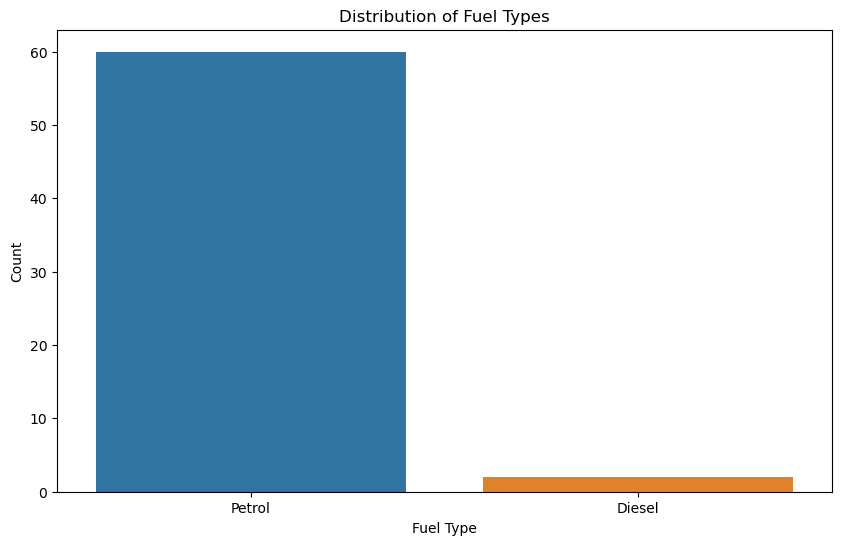

In [36]:
# Plot the distribution of fuel types
count_of_fuel_type = df.groupby('Fuel Type')['Name'].count()
print(count_of_fuel_type)
plt.figure(figsize=(10, 6))
sns.countplot(x='Fuel Type', data=df)
plt.title('Distribution of Fuel Types')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show()

<Figure size 1200x600 with 0 Axes>

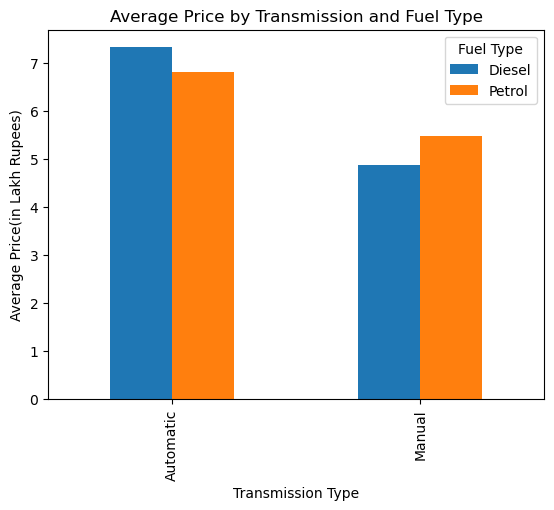

In [37]:
# Calculate average price by transmission and fuel type
avg_price_trans_fuel = df.groupby(['Transmission', 'Fuel Type'])['Price(in Lakh Rupees)'].mean().unstack()

# Plot average price by transmission and fuel type
plt.figure(figsize=(12, 6))
avg_price_trans_fuel.plot(kind='bar')
plt.title('Average Price by Transmission and Fuel Type')
plt.xlabel('Transmission Type')
plt.ylabel('Average Price(in Lakh Rupees)')
plt.show()


#If we want to see only by Petrol because there are only 2 Diesel Car Type

# avg_price_trans_fuel.Petrol.plot(kind='bar')
# plt.title('Average Price by Transmission and Fuel Type')
# plt.xlabel('Transmission Type')
# plt.ylabel('Average Price(in Lakh Rupees)')
# plt.show()

# Thank You